In [7]:
using Random
using Distributions
using LinearAlgebra
using ForwardDiff
include("Plot.jl")
include("NGFlow.jl")
include("../Derivative-Free-Variational-Inference/MultiModal.jl")

Gaussian_mixture_VI (generic function with 1 method)

[ Info: ("iter = ", 50, " / ", 500)
[ Info: ("iter = ", 100, " / ", 500)
[ Info: ("iter = ", 150, " / ", 500)
[ Info: ("iter = ", 200, " / ", 500)
[ Info: ("iter = ", 250, " / ", 500)
[ Info: ("iter = ", 300, " / ", 500)
[ Info: ("iter = ", 350, " / ", 500)
[ Info: ("iter = ", 400, " / ", 500)
[ Info: ("iter = ", 450, " / ", 500)
[ Info: ("iter = ", 500, " / ", 500)
[ Info: ("iter = ", 50, " / ", 500)
[ Info: ("iter = ", 100, " / ", 500)
[ Info: ("iter = ", 150, " / ", 500)
[ Info: ("iter = ", 200, " / ", 500)
[ Info: ("iter = ", 250, " / ", 500)
[ Info: ("iter = ", 300, " / ", 500)
[ Info: ("iter = ", 350, " / ", 500)
[ Info: ("iter = ", 400, " / ", 500)
[ Info: ("iter = ", 450, " / ", 500)
[ Info: ("iter = ", 500, " / ", 500)
[ Info: ("iter = ", 50, " / ", 500)
[ Info: ("iter = ", 100, " / ", 500)
[ Info: ("iter = ", 150, " / ", 500)
[ Info: ("iter = ", 200, " / ", 500)
[ Info: ("iter = ", 250, " / ", 500)
[ Info: ("iter = ", 300, " / ", 500)
[ Info: ("iter = ", 350, " / ", 500)
[ In

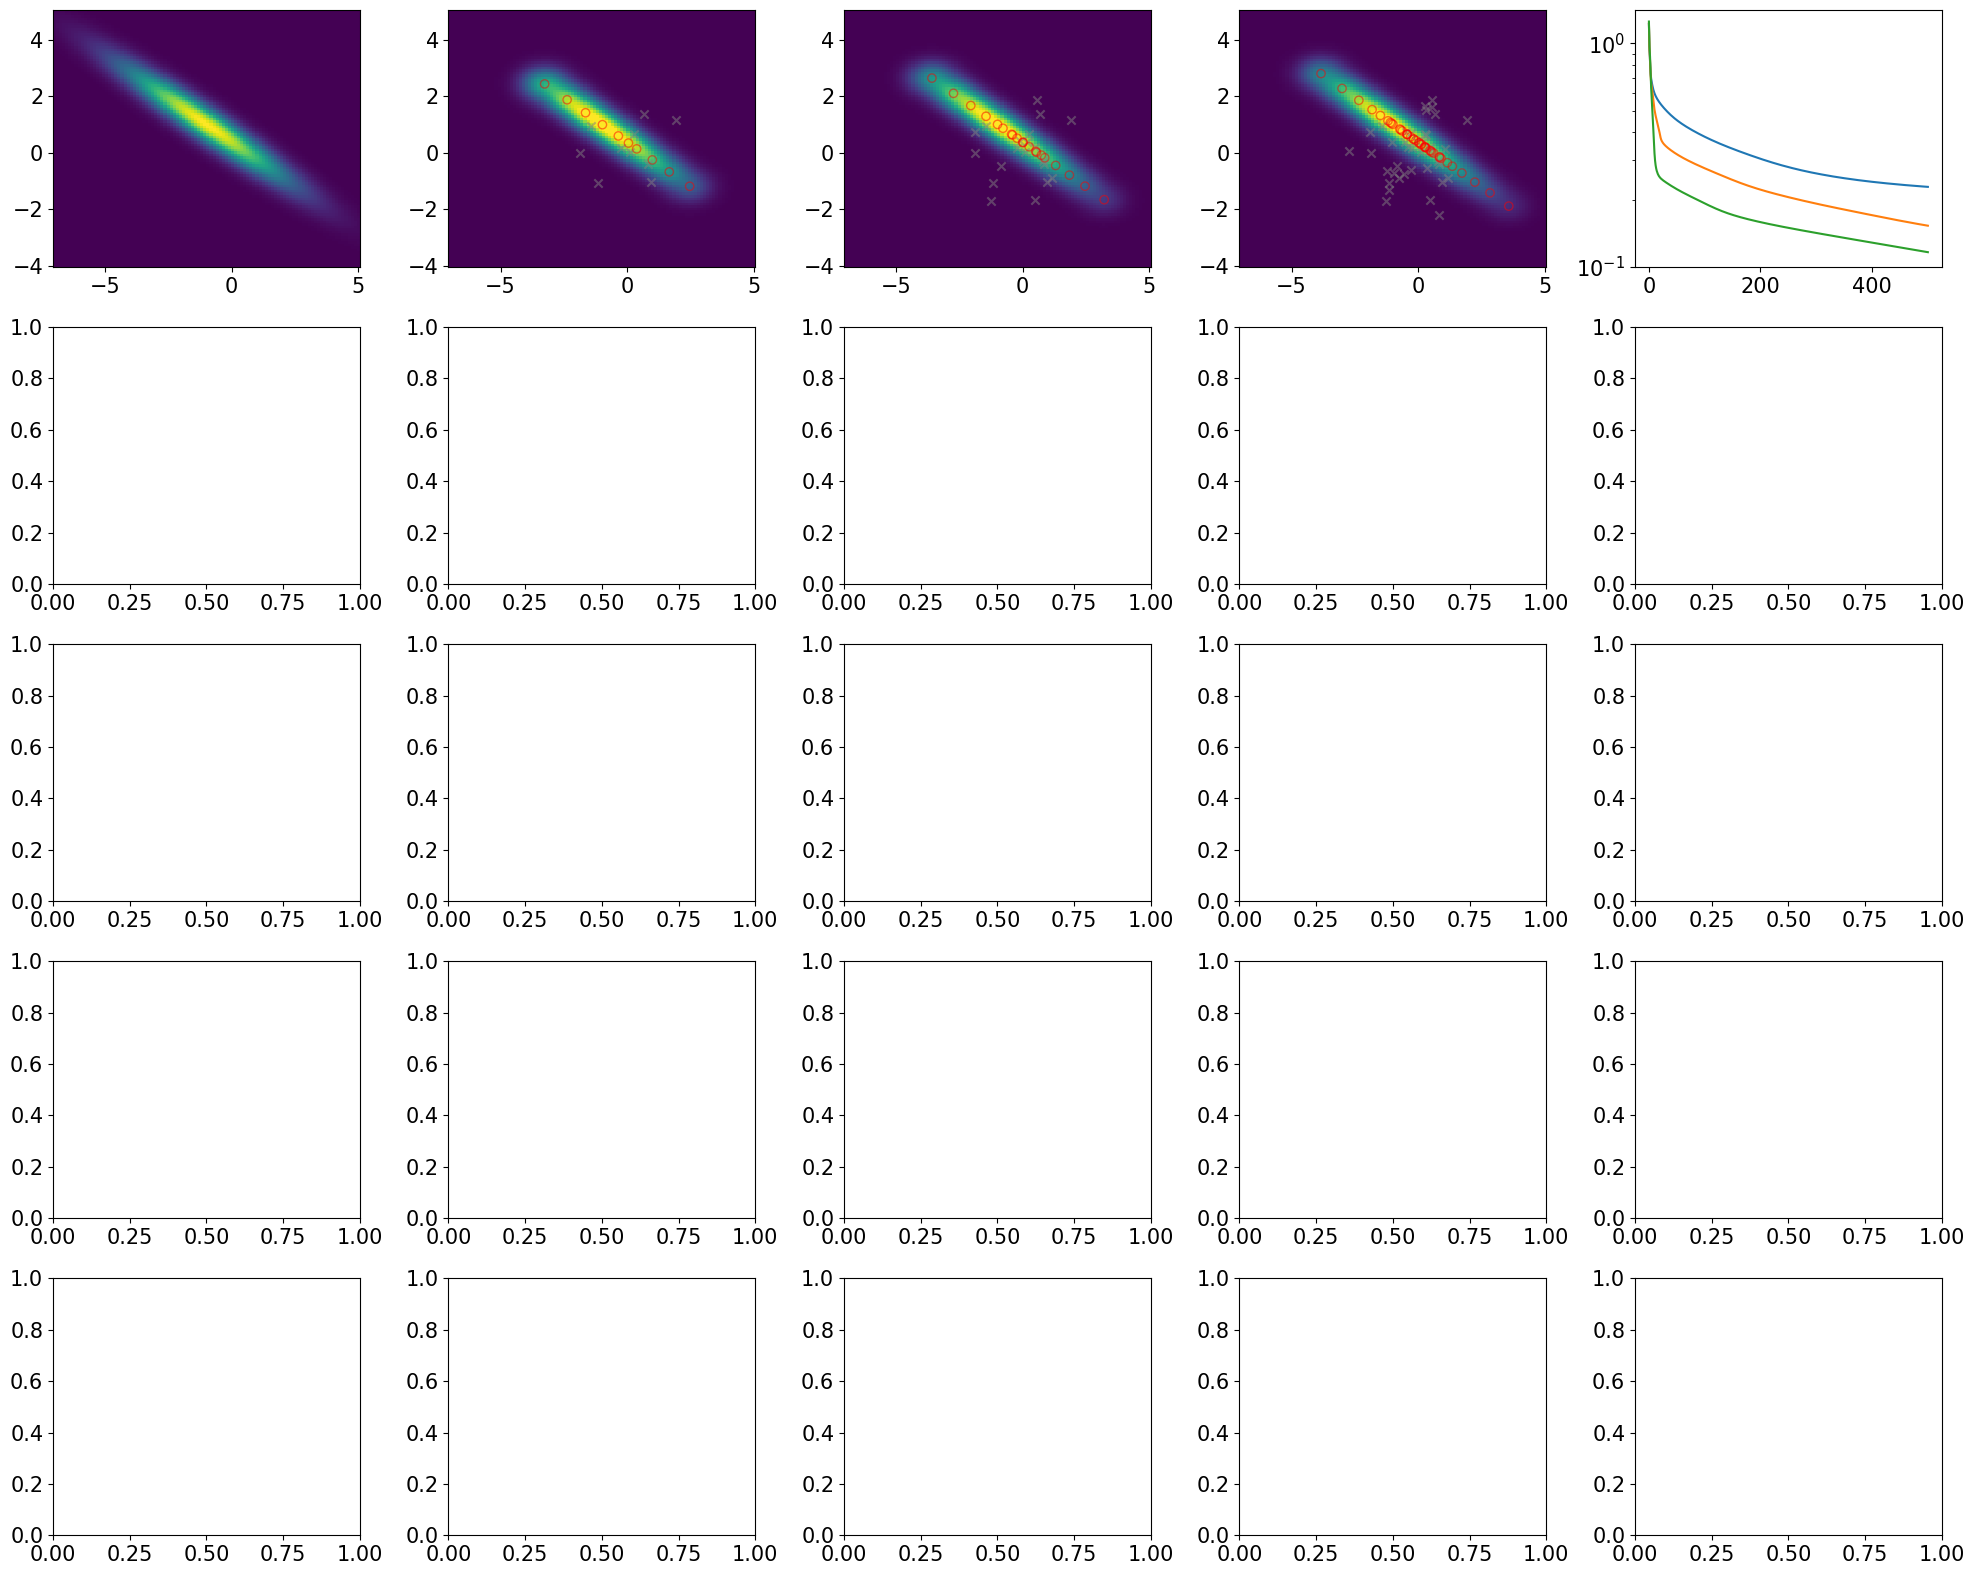

In [8]:
N_modes_array = [10; 20; 40]
fig, ax = PyPlot.subplots(nrows=5, ncols=length(N_modes_array)+2, sharex=false, sharey=false, figsize=(20,16))

    
Random.seed!(11);
#Random.seed!(111);
N_modes = N_modes_array[end]
x0_w  = ones(N_modes)/N_modes
μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
N_x = length(μ0)
x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
for im = 1:N_modes
    x0_mean[im, :]    .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
    xx0_cov[im, :, :] .= Σ0
end




N_iter = 500
Nx, Ny = 100,100

        ση = 1.0
        Gtype = "Gaussian"
        dt = 0.5
        A = [1.0 1.0; 1.0 2.0]
        y = [0.0; 1.0; zeros(N_x-2)]
        func_args = (y, ση, A , Gtype)
        func_F(x) = F(x, func_args)
        func_dPhi(x) = dPhi(x, func_args)
        objs = [Gaussian_mixture_NGFVI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
                for N_modes in N_modes_array]
        # compute marginal distribution
        y_2d = y[1:2]
        func_args = (y_2d, ση, A , Gtype)
        func_F(x) = F(x, func_args)
        visualization_2d(ax[1,:]; Nx = Nx, Ny = Ny, x_lim=[-7.0, 5.0], y_lim=[-4.0, 5.0], func_F=func_F, objs=objs)


#=
        ση = 1.0
        dt = 2e-3
        Gtype = "Four_modes"
        y = [4.2297; 4.2297; 0.5; 0.0; zeros(N_x-2)]
        func_args = (y, ση, 0, Gtype)
        func_F(x) = F(x, func_args)
        func_dPhi(x) = dPhi(x, func_args)
        objs = [Gaussian_mixture_NGFVI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
                for N_modes in N_modes_array]
        # compute marginal distribution
        y_2d = y[1:4]
        func_args = (y_2d, ση, A , Gtype)
        func_F(x) = F(x, func_args)
        visualization_2d(ax[2,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-4, 4], func_F=func_F, objs=objs)



        ση = [0.5; ones(N_x-2)]
        Gtype = "Circle"
        dt = 5e-3
        A = [1.0 1.0; 1.0 2.0]
        y = [1.0; zeros(N_x-2)]
        func_args = (y, ση, A , Gtype)
        func_F(x) = F(x, func_args)
        func_dPhi(x) = dPhi(x, func_args)
        μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
        objs = [Gaussian_mixture_NGFVI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
                for N_modes in N_modes_array]
        # compute marginal distribution
        y_2d, ση_2d = y[1:1], ση[1:1]
        func_args = (y_2d, ση_2d, A , Gtype)
        func_F(x) = F(x, func_args)
        visualization_2d(ax[3,:]; Nx = Nx, Ny = Ny, x_lim=[-3.0, 3.0], y_lim=[-3.0, 3.0], func_F=func_F, objs=objs)



        ση = [sqrt(10.0); sqrt(10.0); ones(N_x-2)]
        Gtype = "Banana"
        dt = 2e-3
        λ = 10.0
        y = [0.0; 1.0; zeros(N_x-2)]
        func_args = (y, ση, λ , Gtype)
        func_F(x) = F(x, func_args)
        func_dPhi(x) = dPhi(x, func_args)
        μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
        objs = [Gaussian_mixture_NGFVI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
                for N_modes in N_modes_array]
        # compute marginal distribution
        y_2d, ση_2d = y[1:2], ση[1:2]
        func_args = (y_2d, ση_2d, λ , Gtype)
        func_F(x) = F(x, func_args)
        visualization_2d(ax[4,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_F=func_F, objs=objs)



        ση = [0.3; 1.0; 1.0; ones(N_x-2)]
        Gtype = "Double_banana"
        dt = 1e-5
        λ = 100.0
        y = [log(λ+1); 0.0; 0.0; zeros(N_x-2)]
        func_args = (y, ση, λ , Gtype)
        func_F(x) = F(x, func_args)
        func_dPhi(x) = dPhi(x, func_args)
        objs = [Gaussian_mixture_NGFVI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
                for N_modes in N_modes_array]
        # compute marginal distribution
        y_2d, ση_2d = y[1:3], ση[1:3]
        func_args = (y_2d, ση_2d, λ , Gtype)
        func_F(x) = F(x, func_args)
        visualization_2d(ax[5,:]; Nx = Nx, Ny = Ny, x_lim=[-3.0, 3.0], y_lim=[-3.0, 3.0], func_F=func_F, objs=objs)
=#
fig.tight_layout()
#fig.savefig("DFGMGD.pdf")